# Grundlegendes

## Markdown-Funktionalitäten (fonts, Liste)

Was *machen* **Sachen**?
1. JupyterNotebook Funktionen zeigen
1. Importe checken
2. Importe testen

* und
* anderes

## Verschiedene ipywidgets: interaktive Schieberegler & Kram

In [109]:
import ipywidgets as widgets
from IPython.display import display

def power(x):
    return x**2

widgets.interact(power, x=range(-10, 11))

interactive(children=(Dropdown(description='x', options=(-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, …

<function __main__.power(x)>

In [110]:
a = widgets.FloatSlider(min=-30, max=30, step=0.1, description="Schieber A", value=1, continuous_update=True, readout=True, readout_format='.3f')
b = widgets.IntSlider(value=50, min=0, max=510, description="Schieber B")

def f1(a,b):
    display(a*b)

def f2(a):
    display(a * 2)

out1 = widgets.interactive_output(f1, {'a': a, 'b': b})
out2 = widgets.interactive_output(f2, {'a': a})

display(a)
display(b)

print("Ergebnis der Multiplikation BEIDER Schieber A & B:")
display(out1)
print("Ergebnis der Multiplikation EINES Schiebers A:")
display(out2)

FloatSlider(value=1.0, description='Schieber A', max=30.0, min=-30.0, readout_format='.3f')

IntSlider(value=50, description='Schieber B', max=510)

Ergebnis der Multiplikation BEIDER Schieber A & B:


Output()

Ergebnis der Multiplikation EINES Schiebers A:


Output()

## Numpy arrays in 1 & 2D

In [111]:
import numpy as np

d1Array = np.array([1,2,3])
d1Array

array([1, 2, 3])

In [112]:
d2Array = np.array([[1,2,3], [11,22,33]])
d2Array

array([[ 1,  2,  3],
       [11, 22, 33]])

## Import CSV mit Panda

In [113]:
import pandas as pd

path = 'cities.csv'

df = pd.read_csv(path)
df.head()

LatD   "LatM"   "LatS"  "NS"   "LonD"   "LonM"   "LonS"  "EW"  \
0    41        5       59   "N"       80       39        0   "W"   
1    42       52       48   "N"       97       23       23   "W"   
2    46       35       59   "N"      120       30       36   "W"   
3    42       16       12   "N"       71       48        0   "W"   
4    43       37       48   "N"       89       46       11   "W"   

               "City"  "State"  
0        "Youngstown"       OH  
1           "Yankton"       SD  
2            "Yakima"       WA  
3         "Worcester"       MA  
4   "Wisconsin Dells"       WI

# Geo-Bibiliothek: Shapely

## Geometrietypen

### Point

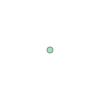

In [114]:
from shapely.geometry import *

p1 = Point(4.2, 2.1)

p1

In [115]:
print(
f"Fläche: {p1.area}\n\
Länge: {p1.length}\n\
WKT: {p1.wkt}\n\
Koordinaten: {p1.x} | {p1.y}\n\
Typ: {p1.type}")

Fläche: 0.0
Länge: 0.0
WKT: POINT (4.2 2.1)
Koordinaten: 4.2 | 2.1
Typ: Point


In [144]:
p2 = Point(32,900)

### Linestring

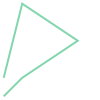

In [116]:
ls1 = LineString(
    (
    (1,0),
    (2,1),
    (5,3),
    (2,5),
    (1,1)
    )
)
ls1

In [117]:
print(
f"Fläche: {ls1.area}\n\
Länge: {ls1.length}\n\
WKT: {ls1.wkt}\n\
Koordinaten: {list(ls1.coords)} \n\
Typ: {ls1.type} \n\
SimpleFeature: {ls1.is_simple}")

Fläche: 0.0
Länge: 12.748421738918733
WKT: LINESTRING (1 0, 2 1, 5 3, 2 5, 1 1)
Koordinaten: [(1.0, 0.0), (2.0, 1.0), (5.0, 3.0), (2.0, 5.0), (1.0, 1.0)] 
Typ: LineString 
SimpleFeature: True


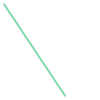

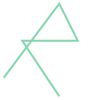

In [118]:
ls2 = LineString(
    (
    (4,0),
    (2,3),
    (5,3),
    (4,5),
    (1,1)
    )
)

ls3 = LineString(
    (
    (4,0),
    (2,3)
    )
)

display(ls3)
ls2

In [119]:
print(
f"BoundingBox: {ls2.bounds} \n\
SimpleFeature: {ls2.is_simple}")

BoundingBox: (1.0, 0.0, 5.0, 5.0) 
SimpleFeature: False


In [120]:
def checkSchnitte(ls1, ls2):
    coords1 = list(ls1.coords)
    coords2 = list(ls2.coords)
    schnitt = []

    for co1 in coords1:
        for co2 in coords2:
            if co1 == co2:
                schnitt.append(co1)

    if len(schnitt)==0:
        return "Keine Schnittpunkte"
    else:
        out = "Schnittpunkte: \n"
        for p in schnitt:
            out += str(p)
            out += '\n'
        return out

In [121]:
checkSchnitte(ls1,ls3)

'Keine Schnittpunkte'

### Polygon

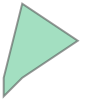

In [122]:
poly1 = Polygon(
    [
        (1,0),
        (2,1),
        (5,3),
        (2,5),
        (1,1),
        (1,0)        
    ]
)
poly1


Fläche: 8.5
Länge: 13.748421738918733
WKT: POLYGON ((1 0, 2 1, 5 3, 2 5, 1 1, 1 0))
Typ: Polygon
Boundary: LINESTRING (1 0, 2 1, 5 3, 2 5, 1 1, 1 0)


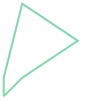

In [123]:
print(
f"Fläche: {poly1.area}\n\
Länge: {poly1.length}\n\
WKT: {poly1.wkt}\n\
Typ: {poly1.type}\n\
Boundary: {poly1.boundary}")

poly1.boundary

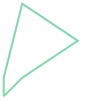

In [124]:
poly1.exterior

#### Bounding Box

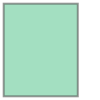

In [125]:
poly1.envelope

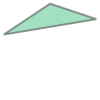

In [126]:
poly2 = Polygon(
    [
        (2,2),
        (8,3),
        (5,4),
        (2,2)
    ]
)
poly2

#### Union

POLYGON ((4 2.333333333333333, 2 1, 1 0, 1 1, 2 5, 4.25 3.5, 5 4, 8 3, 4 2.333333333333333))


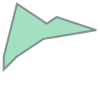

In [127]:
poly3 = poly1.union(poly2)
print(poly3.wkt)
poly3


#### Polygon from WKT

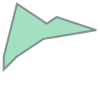

In [128]:
import shapely.wkt

poly_from_wkt = shapely.wkt.loads(poly3.wkt)

poly_from_wkt


### GeometryCollection

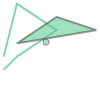

In [129]:
geomColl = GeometryCollection(
    (
    p1,
    ls1,
    poly2
    )
)
geomColl

## Geometrie Funktionen

### Buffer

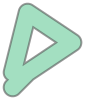

In [137]:
ls1Buffer = ls1.buffer(0.6)

ls1Buffer

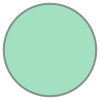

In [132]:
p1Buffer = p1.buffer(1.2)

p1Buffer

In [133]:
list(p1Buffer.exterior.coords)

[(5.4, 2.1),
 (5.394221672006637, 1.9823794316045276),
 (5.376942336483877, 1.8658916135806465),
 (5.348328402878651, 1.7516583872946456),
 (5.3086554390135445, 1.6407798811618928),
 (5.258305517218027, 1.5343239158088036),
 (5.197763534763055, 1.433315720376478),
 (5.127612544035285, 1.3387280590036261),
 (5.048528137423858, 1.2514718625761438),
 (4.961271940996376, 1.1723874559647165),
 (4.866684279623524, 1.1022364652369465),
 (4.765676084191199, 1.0416944827819747),
 (4.6592201188381095, 0.9913445609864566),
 (4.548341612705356, 0.9516715971213499),
 (4.434108386419355, 0.9230576635161238),
 (4.3176205683954745, 0.905778327993364),
 (4.200000000000002, 0.9000000000000001),
 (4.082379431604529, 0.9057783279933638),
 (3.9658916135806486, 0.9230576635161232),
 (3.8516583872946475, 0.9516715971213487),
 (3.740779881161895, 0.9913445609864551),
 (3.6343239158088054, 1.041694482781973),
 (3.5333157203764793, 1.1022364652369445),
 (3.4387280590036275, 1.1723874559647143),
 (3.351471862576

x: 5.4, y: 2.1
x: 5.394221672006637, y: 1.9823794316045276
x: 5.376942336483877, y: 1.8658916135806465
x: 5.348328402878651, y: 1.7516583872946456
x: 5.3086554390135445, y: 1.6407798811618928
x: 5.258305517218027, y: 1.5343239158088036
x: 5.197763534763055, y: 1.433315720376478
x: 5.127612544035285, y: 1.3387280590036261
x: 5.048528137423858, y: 1.2514718625761438
x: 4.961271940996376, y: 1.1723874559647165
x: 4.866684279623524, y: 1.1022364652369465
x: 4.765676084191199, y: 1.0416944827819747
x: 4.6592201188381095, y: 0.9913445609864566
x: 4.548341612705356, y: 0.9516715971213499
x: 4.434108386419355, y: 0.9230576635161238
x: 4.3176205683954745, y: 0.905778327993364
x: 4.200000000000002, y: 0.9000000000000001
x: 4.082379431604529, y: 0.9057783279933638
x: 3.9658916135806486, y: 0.9230576635161232
x: 3.8516583872946475, y: 0.9516715971213487
x: 3.740779881161895, y: 0.9913445609864551
x: 3.6343239158088054, y: 1.041694482781973
x: 3.5333157203764793, y: 1.1022364652369445
x: 3.43872805

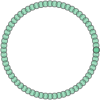

In [135]:
points = []
for x,y in p1Buffer.exterior.coords:
    print(f"x: {x}, y: {y}")
    point = Point(x,y)
    points.append(point)

MultiPoint(points)

### Distance

In [136]:
p1.distance(ls1)

0.305085107923876

### Union, Intersection, ...

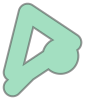

In [138]:
p1Buffer.union(ls1Buffer)

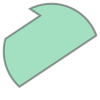

In [140]:
p1Buffer.intersection(ls1Buffer)

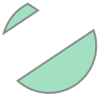

In [139]:
p1Buffer.difference(ls1Buffer)

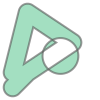

In [141]:
p1Buffer.symmetric_difference(ls1Buffer)

In [152]:
print(ls1Buffer.contains(p1))
print(ls1Buffer.contains(p2))

print(ls1Buffer.intersects(p1))
print(ls1Buffer.intersects(p2))

print(p1Buffer.overlaps(p2.buffer(900)))
print(p1Buffer.overlaps(p2.buffer(90)))


True
False
True
False
True
False


# Geo-Bibliothek: Fiona

In [1]:
import fiona

fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [32]:
with fiona.open("data/ne_10m_admin_0_countries.shp") as source:
    countries = list(source) #Laden der Länder als Liste
    meta = source.meta #Schauen wir uns zu einem späteren Zeitpunkt an!

for i, country in enumerate(countries):
    print(i, country['properties']['NAME'])

0 Indonesia
1 Malaysia
2 Chile
3 Bolivia
4 Peru
5 Argentina
6 Dhekelia
7 Cyprus
8 India
9 China
10 Israel
11 Palestine
12 Lebanon
13 Ethiopia
14 S. Sudan
15 Somalia
16 Kenya
17 Pakistan
18 Malawi
19 Tanzania
20 Syria
21 Somaliland
22 France
23 Suriname
24 Guyana
25 South Korea
26 North Korea
27 Morocco
28 W. Sahara
29 Costa Rica
30 Nicaragua
31 Congo
32 Dem. Rep. Congo
33 Bhutan
34 Ukraine
35 Belarus
36 Namibia
37 South Africa
38 St-Martin
39 Sint Maarten
40 Oman
41 Uzbekistan
42 Kazakhstan
43 Tajikistan
44 Lithuania
45 Brazil
46 Uruguay
47 Mongolia
48 Russia
49 Czechia
50 Germany
51 Estonia
52 Latvia
53 Norway
54 Sweden
55 Finland
56 Vietnam
57 Cambodia
58 Luxembourg
59 United Arab Emirates
60 Belgium
61 Georgia
62 North Macedonia
63 Albania
64 Azerbaijan
65 Kosovo
66 Turkey
67 Spain
68 Laos
69 Kyrgyzstan
70 Armenia
71 Denmark
72 Libya
73 Tunisia
74 Romania
75 Hungary
76 Slovakia
77 Poland
78 Ireland
79 United Kingdom
80 Greece
81 Zambia
82 Sierra Leone
83 Guinea
84 Liberia
85 Central

## Attributwerte auslesen

In [7]:
nigeria = countries[100]
nigeria

{'type': 'Feature',
 'id': '100',
 'properties': OrderedDict([('featurecla', 'Admin-0 country'),
              ('scalerank', 0),
              ('LABELRANK', 2),
              ('SOVEREIGNT', 'Nigeria'),
              ('SOV_A3', 'NGA'),
              ('ADM0_DIF', 0),
              ('LEVEL', 2),
              ('TYPE', 'Sovereign country'),
              ('ADMIN', 'Nigeria'),
              ('ADM0_A3', 'NGA'),
              ('GEOU_DIF', 0),
              ('GEOUNIT', 'Nigeria'),
              ('GU_A3', 'NGA'),
              ('SU_DIF', 0),
              ('SUBUNIT', 'Nigeria'),
              ('SU_A3', 'NGA'),
              ('BRK_DIFF', 0),
              ('NAME', 'Nigeria'),
              ('NAME_LONG', 'Nigeria'),
              ('BRK_A3', 'NGA'),
              ('BRK_NAME', 'Nigeria'),
              ('BRK_GROUP', None),
              ('ABBREV', 'Nigeria'),
              ('POSTAL', 'NG'),
              ('FORMAL_EN', 'Federal Republic of Nigeria'),
              ('FORMAL_FR', None),
              

In [8]:
nigeria['properties']

OrderedDict([('featurecla', 'Admin-0 country'),
             ('scalerank', 0),
             ('LABELRANK', 2),
             ('SOVEREIGNT', 'Nigeria'),
             ('SOV_A3', 'NGA'),
             ('ADM0_DIF', 0),
             ('LEVEL', 2),
             ('TYPE', 'Sovereign country'),
             ('ADMIN', 'Nigeria'),
             ('ADM0_A3', 'NGA'),
             ('GEOU_DIF', 0),
             ('GEOUNIT', 'Nigeria'),
             ('GU_A3', 'NGA'),
             ('SU_DIF', 0),
             ('SUBUNIT', 'Nigeria'),
             ('SU_A3', 'NGA'),
             ('BRK_DIFF', 0),
             ('NAME', 'Nigeria'),
             ('NAME_LONG', 'Nigeria'),
             ('BRK_A3', 'NGA'),
             ('BRK_NAME', 'Nigeria'),
             ('BRK_GROUP', None),
             ('ABBREV', 'Nigeria'),
             ('POSTAL', 'NG'),
             ('FORMAL_EN', 'Federal Republic of Nigeria'),
             ('FORMAL_FR', None),
             ('NAME_CIAWF', 'Nigeria'),
             ('NOTE_ADM0', None),
             (

In [10]:
population = nigeria['properties']['POP_EST']
population

190632261

In [11]:
nga_geometry = nigeria['geometry']
nga_geometry

{'type': 'MultiPolygon',
 'coordinates': [[[(3.596400187000114, 11.69577301000001),
    (3.6477665610000827, 11.726003723000105),
    (3.659858846000077, 11.738096009000103),
    (3.666990194000107, 11.759696757000071),
    (3.662029256000068, 11.779488831000052),
    (3.649730265000102, 11.797833964000034),
    (3.6262691650000534, 11.822535299000052),
    (3.622031698000086, 11.825015768000114),
    (3.618621053000055, 11.828374736000029),
    (3.612936645000019, 11.838968405000102),
    (3.6097327070001484, 11.848786927000077),
    (3.6039449460000696, 11.905579325000105),
    (3.608492473000098, 11.921960754000054),
    (3.619551229000109, 11.936275127000044),
    (3.6366044520001424, 11.953586732000048),
    (3.6535543210000583, 11.986814677000083),
    (3.6489034420000905, 12.021024475000075),
    (3.62399540200002, 12.094249980000072),
    (3.6245121660000734, 12.13765818300007),
    (3.6514872640000817, 12.269019674000063),
    (3.6415653890001067, 12.517996725000103),
    (3.6

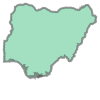

In [14]:
from shapely.geometry import shape, mapping

nga_geometry_shapely = shape(nga_geometry)
nga_geometry_shapely

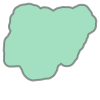

In [15]:
nga_geometry_shapely.buffer(1)

In [16]:
nga_geometry_shapely.length

54.80388974245636

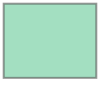

In [17]:
nga_geometry_shapely.envelope

## Metadaten auslesen

In [19]:
print(meta.keys())

dict_keys(['driver', 'schema', 'crs', 'crs_wkt'])


In [27]:
print("Dateytyp: ",meta['driver'])
print("Erlaubte Operationen: ", fiona.supported_drivers[meta['driver']], "(r: read, a: append, w: write)")
print("Koordinatenreferenzsystem: ", meta['crs'])
print("Schema/Datentypen: ", meta['schema'])

Dateytyp:  ESRI Shapefile
Erlaubte Operationen:  raw (r: read, a: append, w: write)
Koordinatenreferenzsystem:  {'init': 'epsg:4326'}
Schema/Datentypen:  {'properties': OrderedDict([('featurecla', 'str:15'), ('scalerank', 'int:1'), ('LABELRANK', 'int:2'), ('SOVEREIGNT', 'str:32'), ('SOV_A3', 'str:3'), ('ADM0_DIF', 'int:1'), ('LEVEL', 'int:1'), ('TYPE', 'str:17'), ('ADMIN', 'str:36'), ('ADM0_A3', 'str:3'), ('GEOU_DIF', 'int:1'), ('GEOUNIT', 'str:36'), ('GU_A3', 'str:3'), ('SU_DIF', 'int:1'), ('SUBUNIT', 'str:36'), ('SU_A3', 'str:3'), ('BRK_DIFF', 'int:1'), ('NAME', 'str:29'), ('NAME_LONG', 'str:36'), ('BRK_A3', 'str:3'), ('BRK_NAME', 'str:32'), ('BRK_GROUP', 'str:17'), ('ABBREV', 'str:16'), ('POSTAL', 'str:4'), ('FORMAL_EN', 'str:52'), ('FORMAL_FR', 'str:35'), ('NAME_CIAWF', 'str:45'), ('NOTE_ADM0', 'str:22'), ('NOTE_BRK', 'str:63'), ('NAME_SORT', 'str:36'), ('NAME_ALT', 'str:19'), ('MAPCOLOR7', 'int:1'), ('MAPCOLOR8', 'int:1'), ('MAPCOLOR9', 'int:1'), ('MAPCOLOR13', 'int:3'), ('POP_EST

## GPKG erzeugen

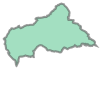

{'type': 'Feature',
 'id': '85',
 'properties': OrderedDict([('featurecla', 'Admin-0 country'),
              ('scalerank', 0),
              ('LABELRANK', 4),
              ('SOVEREIGNT', 'Central African Republic'),
              ('SOV_A3', 'CAF'),
              ('ADM0_DIF', 0),
              ('LEVEL', 2),
              ('TYPE', 'Sovereign country'),
              ('ADMIN', 'Central African Republic'),
              ('ADM0_A3', 'CAF'),
              ('GEOU_DIF', 0),
              ('GEOUNIT', 'Central African Republic'),
              ('GU_A3', 'CAF'),
              ('SU_DIF', 0),
              ('SUBUNIT', 'Central African Republic'),
              ('SU_A3', 'CAF'),
              ('BRK_DIFF', 0),
              ('NAME', 'Central African Rep.'),
              ('NAME_LONG', 'Central African Republic'),
              ('BRK_A3', 'CAF'),
              ('BRK_NAME', 'Central African Rep.'),
              ('BRK_GROUP', None),
              ('ABBREV', 'C.A.R.'),
              ('POSTAL', 'CF'),


In [40]:
centralAfricanRepublic = countries[85]

CAR_geom = centralAfricanRepublic['geometry']
display(shape(CAR_geom)) # shapely zum Visualisieren
centralAfricanRepublic

### Geometrie ändern

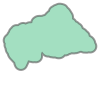

In [43]:
CAR_buffer = shape(CAR_geom).buffer(1)
CAR_buffer

### Attribut ändern

In [45]:
CAR_properties = centralAfricanRepublic['properties']
CAR_properties['ABBREV'] = "CAR"

CAR_properties

OrderedDict([('featurecla', 'Admin-0 country'),
             ('scalerank', 0),
             ('LABELRANK', 4),
             ('SOVEREIGNT', 'Central African Republic'),
             ('SOV_A3', 'CAF'),
             ('ADM0_DIF', 0),
             ('LEVEL', 2),
             ('TYPE', 'Sovereign country'),
             ('ADMIN', 'Central African Republic'),
             ('ADM0_A3', 'CAF'),
             ('GEOU_DIF', 0),
             ('GEOUNIT', 'Central African Republic'),
             ('GU_A3', 'CAF'),
             ('SU_DIF', 0),
             ('SUBUNIT', 'Central African Republic'),
             ('SU_A3', 'CAF'),
             ('BRK_DIFF', 0),
             ('NAME', 'Central African Rep.'),
             ('NAME_LONG', 'Central African Republic'),
             ('BRK_A3', 'CAF'),
             ('BRK_NAME', 'Central African Rep.'),
             ('BRK_GROUP', None),
             ('ABBREV', 'CAR'),
             ('POSTAL', 'CF'),
             ('FORMAL_EN', 'Central African Republic'),
             ('FOR

### Neues Dictionary

In [46]:
new_CAR = {
    'geometry': mapping(CAR_buffer),
    'properties': CAR_properties    
}

new_CAR

{'geometry': {'type': 'Polygon',
  'coordinates': (((13.683855389100865, 6.752830131430992),
    (13.687433004390783, 6.757217400243979),
    (13.756403389349012, 6.826657579524442),
    (13.759410153492318, 6.829402125812119),
    (13.772502964864744, 6.842041949128275),
    (13.797926107044505, 6.8643315152123385),
    (13.839986883947356, 6.909126714093506),
    (13.912877493654479, 6.973042225627431),
    (13.974827157959245, 7.017540903582973),
    (14.00759424763622, 7.091496846980608),
    (14.018172508412505, 7.115372181274662),
    (14.064211253859256, 7.206431576812404),
    (14.119289587815079, 7.29232544578255),
    (14.182834068837531, 7.372159514510111),
    (14.196343579574277, 7.387460060866575),
    (14.202815327633244, 7.404286605283205),
    (14.241200612163075, 7.490110620487649),
    (14.265450901833315, 7.555550410111243),
    (14.270101780833368, 7.566557491111245),
    (14.290510148875867, 7.606543611569801),
    (14.29473213054025, 7.617156560061462),
    (14.3

### Neues Dictionary mit Fiona als GPKG speichern

In [48]:
with fiona.open(
                "newCentAfrRep.gpkg", "w",
                crs = meta["crs"],
                schema = meta["schema"],
                driver = "GPKG"
            ) as sink:
    sink.write(new_CAR)

## Oder HCU-Shape neu erzeugen:

In [51]:
from fiona.crs import from_epsg

hcu = {
    "geometry": {
        "type": "Point",
        "coordinates": (566580,5932839)
    },
    "properties": {
        "name": "HafenCity Universität",
        "baujahr": 2013
    }
}

utm32n = from_epsg(25832)

hcu_schema = {
    "geometry": "Point",
    "properties": {
        "name": "str",
        "baujahr": "int"
    }
}

### Neues Dictionary mit Fiona als GPKG speichern

In [53]:
with fiona.open("hcu.gpkg", "w",
                schema=hcu_schema,
                crs = utm32n,
                driver="GPKG") as sink:
                sink.write(hcu)